In [1]:
pip install hmmlearn

     |████████████████████████████████| 374 kB 28.6 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [3]:
def get_data(name,file_name,MA=None,period=None):

  df = pd.read_csv(file_name,parse_dates=['formatted_date'])
  if period:
      df = df.groupby(pd.Grouper(key='formatted_date', freq=period)).mean()
  df['rates'] = df['close'].pct_change()
  if MA:
    df['rates'] = df.loc[:,'rates'].rolling(window=MA).mean()
  return df

In [4]:
def predict(num_states,observ,train=True):
  
  hmm_model = GaussianHMM(n_components=num_states, covariance_type="full", n_iter=1000).fit(observ)
  hidden_states = hmm_model.predict(observ)
  return hidden_states


In [5]:
def plot_states(df,hidden_states):

  df['hidden_states'] = hidden_states
  colors = {0:'blue',1:'red',2:'black',4:'green'}
  c_map = df['hidden_states'].replace(colors)
  plt.figure(figsize=(10,10))
  plt.scatter(np.arange(len(df)),df['close'],c=c_map)
  plt.ylabel('close price')
  plt.xlabel('time step')
  plt.show()

In [6]:
def main(num_states=2,MA=None,period=None):
  files = ['/content/DJI.csv','/content/GSPC.csv','/content/IXIC.csv','/content/VIX.csv']
  print(f'''moving average: {MA}\n
        period: {period}\n''')
  for file in files:
    name = file.split('/')[-1].split('.')[0]
    df = get_data(name,file,MA=MA,period=period)
    df.dropna(inplace=True)
    train_idx = int(len(df)*4/5)
    train = df.iloc[:train_idx,:]
    test = df.iloc[train_idx:,:]
    hmm_model = GaussianHMM(n_components=num_states, covariance_type="full", n_iter=1000).fit(train['rates'].values.reshape(-1, 1))
    train_states = hmm_model.predict(train['rates'].values.reshape(-1, 1))
    test_states = hmm_model.predict(test['rates'].values.reshape(-1, 1))
    print(f'train: {name}\n')
    plot_states(train,train_states)
    print(f'test: {name}\n')
    plot_states(test,test_states)

moving average: None

        period: None

train: DJI



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


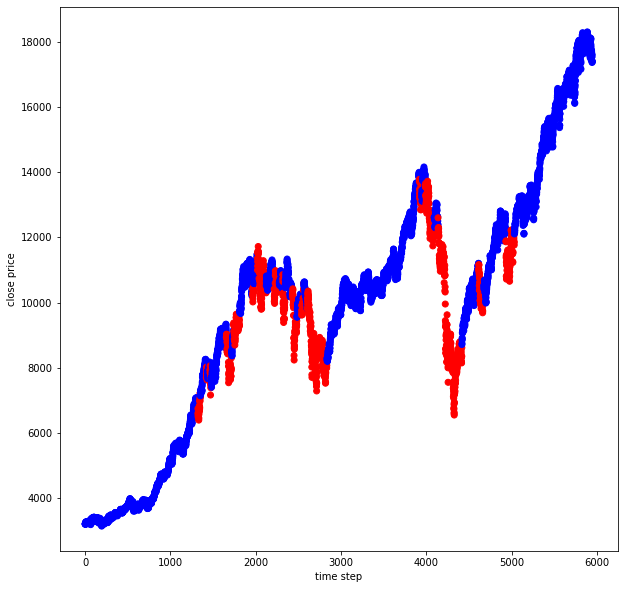

test: DJI



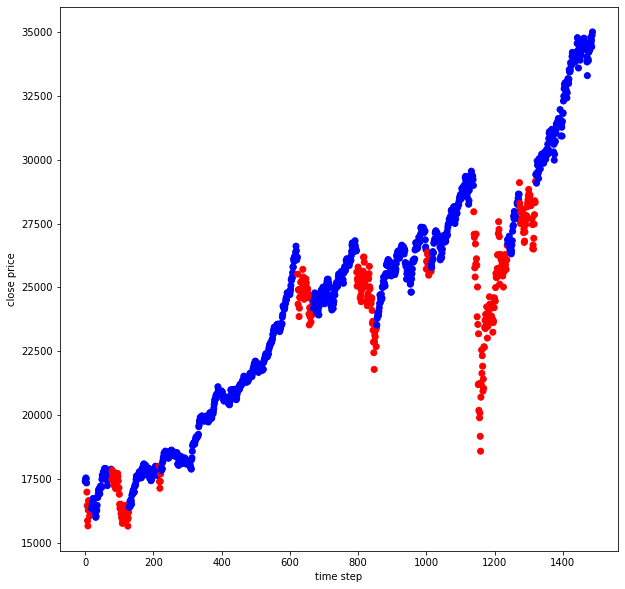

train: GSPC



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


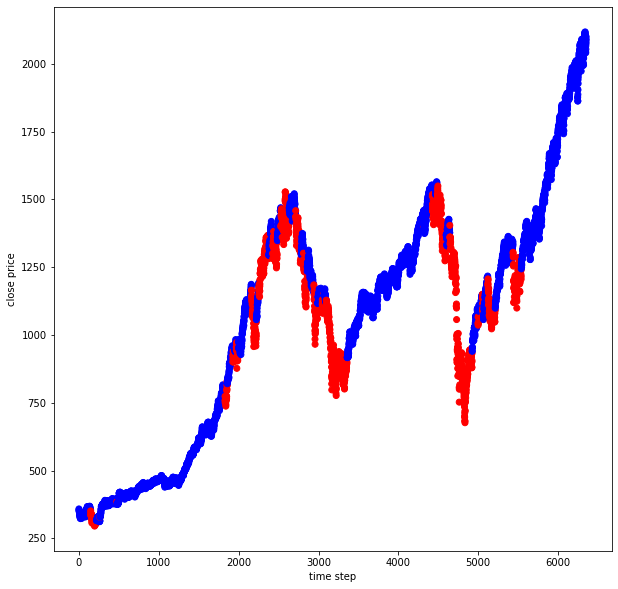

test: GSPC



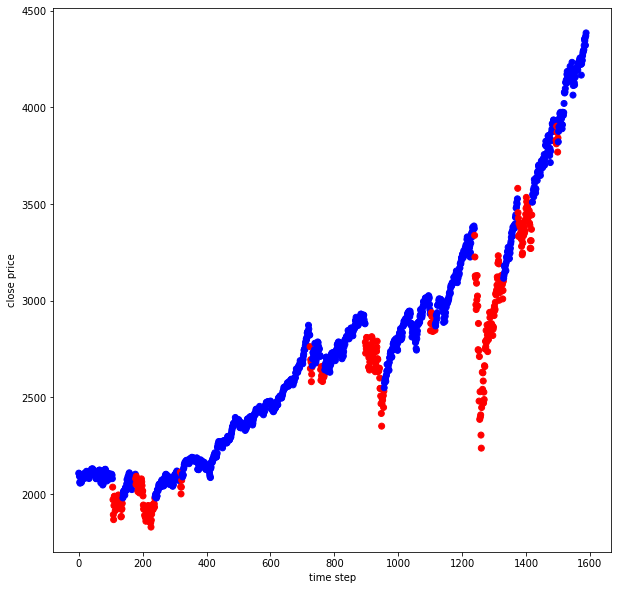

train: IXIC



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


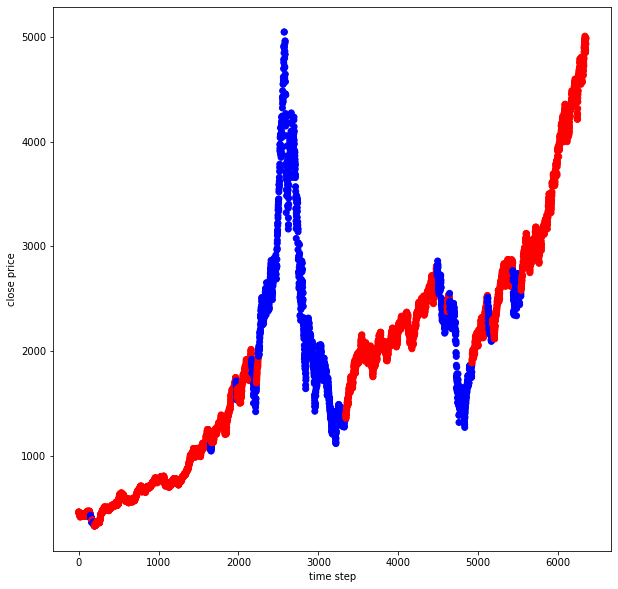

test: IXIC



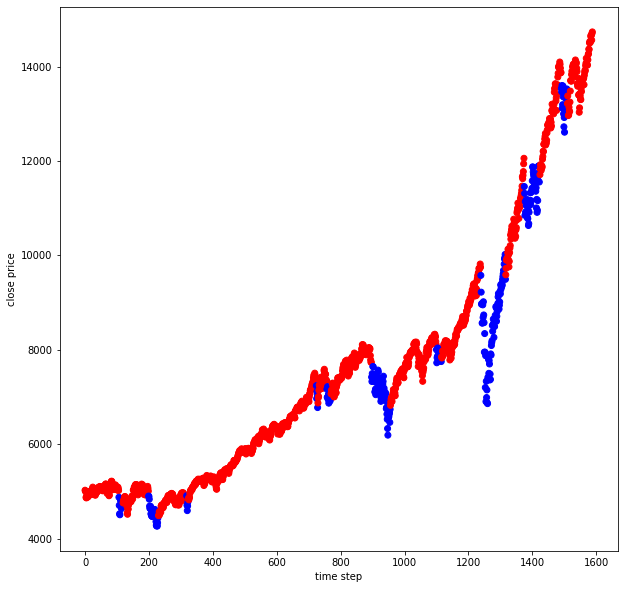

train: VIX



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


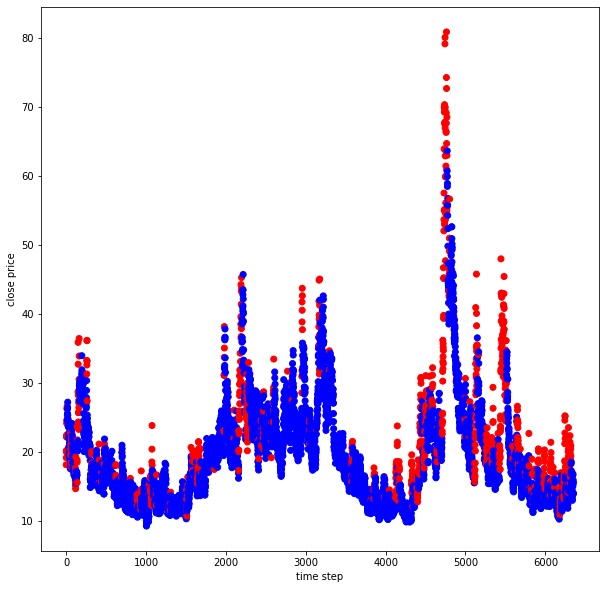

test: VIX



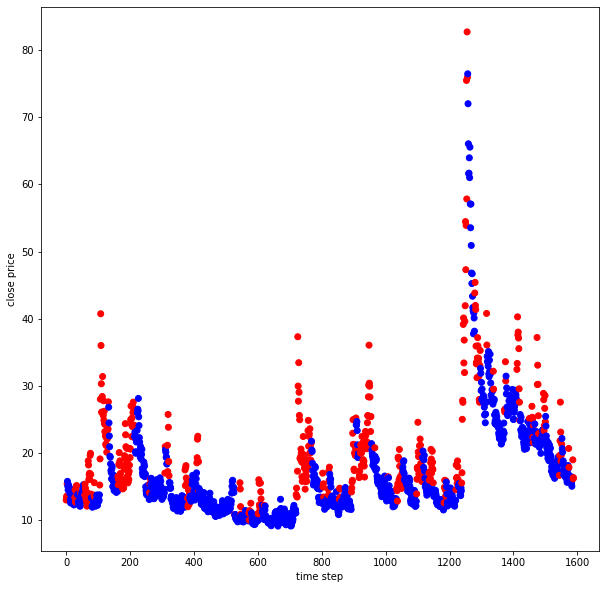

In [7]:
if __name__ == "__main__":
  main()